In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/Dataset/pizza_vs_not/'
def getdata(path):
  data = torch.tensor([])
  file_list = os.listdir(path)
  for file_name in file_list[:350]:
    image_path = os.path.join(path, file_name)
    image = mpimg.imread(image_path)
    imageData = torch.from_numpy(image).long()
    data = torch.cat((data, imageData.unsqueeze(0)), dim=0)
  return data

In [ ]:
#
pizza_path = '/content/drive/MyDrive/Dataset/pizza_vs_not/pizza'
not_pizza_path = '/content/drive/MyDrive/Dataset/pizza_vs_not/not_pizza'
#

not_pizza_data = getdata(not_pizza_path)
pizza_data = getdata(pizza_path)

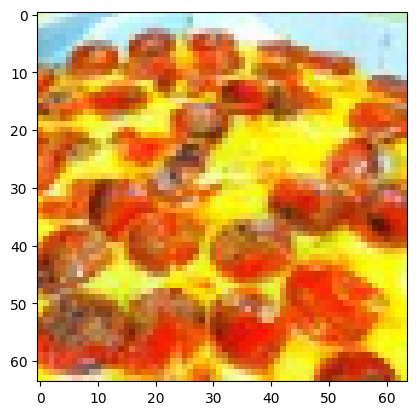

In [ ]:
# Change values of index, data
#
index = 28 # 0 to 349
data = pizza_data # pizza_data (or) not_pizza_data
#

plt.imshow(data[index].int())

In [ ]:
train_data = torch.cat((pizza_data[:300], not_pizza_data[:200]), dim = 0)
test_data = torch.cat((pizza_data[300:350], not_pizza_data[200:250]), dim = 0)
print(train_data.shape)

torch.Size([500, 64, 64, 3])


In [ ]:
#

reshaped_train_data = np.reshape(train_data, (500,64*64*3))
reshaped_test_data =  np.reshape(test_data, (100,64*64*3))

final_train_data = ((reshaped_train_data / 255))
final_test_data = ((reshaped_test_data / 255))

#
print(final_train_data.shape, final_test_data.shape)


torch.Size([500, 12288]) torch.Size([100, 12288])


In [ ]:
#


train_labels =torch.cat((torch.ones(300,1),torch.zeros(200,1)),dim=0)
#print(train_labels)

test_labels =torch.cat((torch.ones(50,1),torch.zeros(50,1)),dim=0)


#

print(train_labels.shape, test_labels.shape)

torch.Size([500, 1]) torch.Size([100, 1])


In [ ]:
#

D_in = 64*64*3
H1 = 10
H2 = 12
D_out = 1

#

In [ ]:
model = torch.nn.Sequential(
    nn.Linear(D_in, H1),  # Linear layer from input to the first hidden layer
    nn.ReLU(),           # ReLU activation function for the first hidden layer
    nn.Linear(H1, H2),    # Linear layer from the first hidden layer to the second hidden layer
    nn.ReLU(),           # ReLU activation function for the second hidden layer
    nn.Linear(H2, D_out), # Linear layer from the second hidden layer to the output
    nn.Sigmoid()          # Sigmoid activation function for the output
)


In [ ]:
model(final_train_data[0]) #To check if the model works

tensor([0.4451], grad_fn=<SigmoidBackward0>)

In [ ]:
loss_fn = nn.BCELoss()

#

learning_rate = 0.005
iterations = 10000

for t in range(iterations):

    # call the model on the dataset
    y_pred = model(final_train_data)

    #calculate the loss
    loss = loss_fn( y_pred, train_labels )

    if t%1000 == 1:
        print(loss)

    #calculate the gradients (dont forget to reset the gradients before you begin)
    model.zero_grad()
    loss.backward()

    # update the values of the parameters
    with torch.no_grad():
      for parameter in model.parameters():
           parameter -= learning_rate * parameter.grad

#

torch.save(model, 'model_best.pt')

tensor(0.0012, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0011, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0007, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0006, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)


According to the neural network, index = 6 is a pizza.


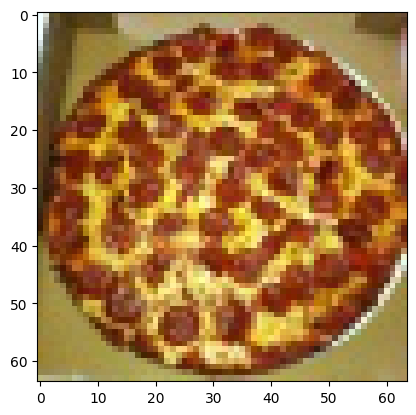

In [ ]:
# Change values of index
#
index = 6 #0 to 99
#

plt.imshow(test_data[index].int())
prediction = "a pizza" if model(final_test_data[index]) > 0.5 else "not a pizza"
print(f"According to the neural network, index = {index} is {prediction}.")

In [ ]:
def predict(model, data, labels):

    probabilities = model(data)

    #

    # generate the predictions tensor using the probabilities variable, which indicates the prediction made by the model for the given data using 0 and 1

    predictions = (probabilities > 0.5).float()

    #

    print("Accuracy: "  + str(torch.sum((predictions == labels)).item()/predictions.shape[0]))

In [ ]:

predict(model, final_train_data, train_labels)
predict(model,final_test_data,test_labels)
print("Done!")

Accuracy: 1.0
Accuracy: 0.83
Done!
